<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/VGG16_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [52]:
# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

In [53]:
# Verifying dataset
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


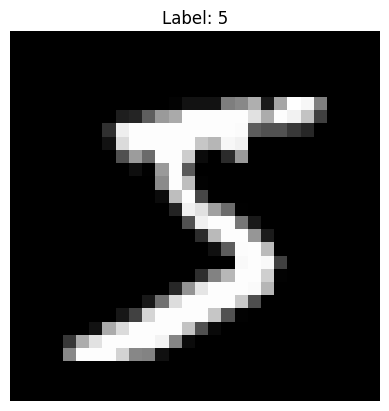

In [54]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [55]:
new_size = int(len(xtrain) * 0.1)
xtrain_reduced = xtrain[:new_size]
ytrain_reduced = ytrain[:new_size]

xtrain = xtrain_reduced
ytrain = ytrain_reduced

# Az új adatok ellenőrzése
print("Csökkentett xtrain méret:", xtrain.shape)
print("Csökkentett ytrain méret:", ytrain.shape)


new_size = int(len(xtest) * 0.2)
xtest_reduced = xtest[:new_size]
ytest_reduced = ytest[:new_size]

xtest = xtest_reduced
ytest = ytest_reduced

# Az új adatok ellenőrzése
print("Csökkentett xtest méret:", xtest.shape)
print("Csökkentett ytest méret:", ytest.shape)

Csökkentett xtrain méret: (6000, 28, 28)
Csökkentett ytrain méret: (6000,)
Csökkentett xtest méret: (2000, 28, 28)
Csökkentett ytest méret: (2000,)


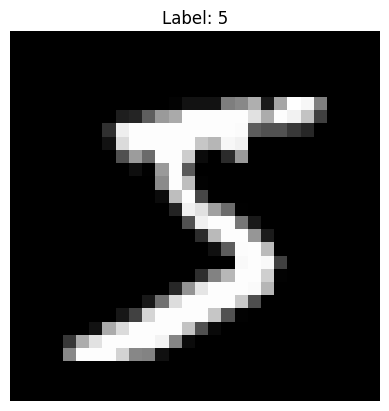

In [56]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [57]:
# Színes csatornák hozzáadása
xtrain = np.expand_dims(xtrain, axis=-1)
xtrain = np.repeat(xtrain, 3, axis=-1)

xtest = np.expand_dims(xtest, axis=-1)
xtest = np.repeat(xtest, 3, axis=-1)

print(xtrain.shape, xtest.shape)

(6000, 28, 28, 3) (2000, 28, 28, 3)


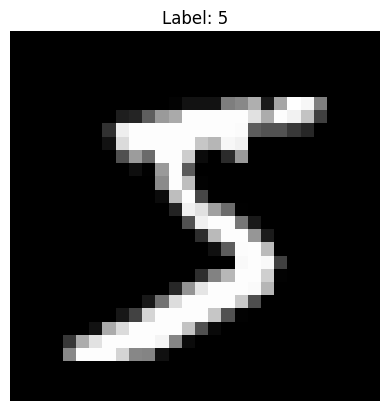

In [58]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [59]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((6000, 28, 28, 3), (2000, 28, 28, 3))

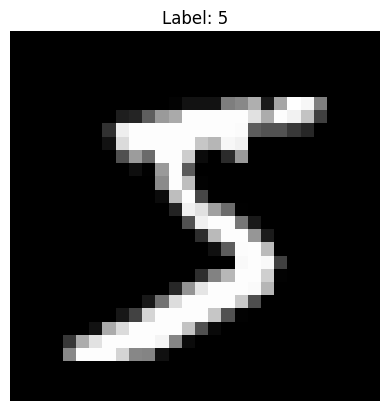

In [60]:

# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [61]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((6000, 48, 48, 3), (2000, 48, 48, 3))

In [62]:
# # listing the folders containing images

# preparing array that can be used later

class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [63]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [64]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(6000, 48, 48, 3)
(6000, 10)
Test Dataset
(2000, 48, 48, 3)
(2000, 10)
Validation Dataset
(2000, 48, 48, 3)
(2000, 10)


In [65]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                          

In [66]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (48,48,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None

In [67]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [68]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [70]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [71]:
# Fit the Model

history = model.fit(xtrain,ytrain,epochs=4,batch_size=128,verbose=True,validation_data=(xtest,ytest))
print("Fitting the model completed.")

Epoch 1/4
38/38 [==============================] - 12s 78ms/step - loss: 6.8915 - accuracy: 0.2415 - val_loss: 2.7091 - val_accuracy: 0.4742
Epoch 2/4
38/38 [==============================] - 1s 37ms/step - loss: 1.7144 - accuracy: 0.6123 - val_loss: 1.3110 - val_accuracy: 0.6683
Epoch 3/4
38/38 [==============================] - 1s 38ms/step - loss: 0.9615 - accuracy: 0.7419 - val_loss: 0.9017 - val_accuracy: 0.7550
Epoch 4/4
38/38 [==============================] - 1s 38ms/step - loss: 0.6867 - accuracy: 0.8052 - val_loss: 0.7120 - val_accuracy: 0.7983
Fitting the model completed.


In [72]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label),
                                            100*np.max(predictions_array), Get_Element_Name(true_label),
                                            color=color, horizontalalignment='left'))


#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label],
#                                          100*np.max(predictions_array), val_class_names[true_label]),
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [73]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 461ms/step


  0%|          | 1/2000 [00:00<26:54,  1.24it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 3/2000 [00:00<08:17,  4.01it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 5/2000 [00:01<04:59,  6.67it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 7/2000 [00:01<03:38,  9.13it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 9/2000 [00:01<02:56, 11.25it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 11/2000 [00:01<02:33, 12.93it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 13/2000 [00:01<02:17, 14.44it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 15/2000 [00:01<02:12, 14.99it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 17/2000 [00:01<02:07, 15.51it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 19/2000 [00:01<02:04, 15.96it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 21/2000 [00:01<01:59, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 23/2000 [00:02<01:58, 16.66it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 25/2000 [00:02<01:56, 16.99it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 27/2000 [00:02<01:54, 17.21it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 29/2000 [00:02<01:52, 17.50it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 31/2000 [00:02<01:51, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 33/2000 [00:02<01:52, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 35/2000 [00:02<01:55, 17.07it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 37/2000 [00:02<01:56, 16.82it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 39/2000 [00:02<01:54, 17.18it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 41/2000 [00:03<01:54, 17.08it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 43/2000 [00:03<01:55, 16.95it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 45/2000 [00:03<01:53, 17.17it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 47/2000 [00:03<01:51, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 49/2000 [00:03<01:53, 17.14it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 51/2000 [00:03<01:57, 16.62it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 53/2000 [00:03<01:54, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 55/2000 [00:03<01:52, 17.33it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 57/2000 [00:04<01:52, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 59/2000 [00:04<01:52, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 61/2000 [00:04<01:57, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 63/2000 [00:04<01:56, 16.67it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 65/2000 [00:04<01:52, 17.19it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 67/2000 [00:04<01:53, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 69/2000 [00:04<01:54, 16.85it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 71/2000 [00:04<01:53, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 73/2000 [00:04<01:54, 16.88it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 75/2000 [00:05<01:55, 16.71it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 77/2000 [00:05<01:55, 16.65it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 79/2000 [00:05<01:58, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 81/2000 [00:05<01:59, 16.04it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 83/2000 [00:05<01:59, 16.04it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 85/2000 [00:05<01:58, 16.23it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 87/2000 [00:05<01:59, 16.02it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 89/2000 [00:05<01:54, 16.70it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 91/2000 [00:06<01:53, 16.86it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 93/2000 [00:06<01:54, 16.64it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 95/2000 [00:06<01:52, 16.88it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 97/2000 [00:06<01:52, 16.88it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 99/2000 [00:06<01:49, 17.37it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 101/2000 [00:06<01:55, 16.45it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 103/2000 [00:06<01:54, 16.60it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 105/2000 [00:06<01:54, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 107/2000 [00:07<01:53, 16.73it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 109/2000 [00:07<01:51, 16.94it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 111/2000 [00:07<01:49, 17.18it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 113/2000 [00:07<01:50, 17.14it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 115/2000 [00:07<01:52, 16.73it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 117/2000 [00:07<01:57, 16.08it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 119/2000 [00:07<01:53, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 121/2000 [00:07<02:01, 15.45it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 123/2000 [00:08<02:12, 14.16it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 125/2000 [00:08<02:19, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▋         | 127/2000 [00:08<02:24, 12.96it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 129/2000 [00:08<02:30, 12.45it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 131/2000 [00:08<02:34, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 133/2000 [00:08<02:40, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 135/2000 [00:09<02:38, 11.78it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 137/2000 [00:09<02:35, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 139/2000 [00:09<02:39, 11.64it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 141/2000 [00:09<02:38, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 143/2000 [00:09<02:43, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 145/2000 [00:09<02:42, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 147/2000 [00:10<02:43, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 149/2000 [00:10<02:42, 11.37it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 151/2000 [00:10<02:40, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 153/2000 [00:10<02:37, 11.76it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 155/2000 [00:10<02:33, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 157/2000 [00:10<02:31, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 159/2000 [00:11<02:30, 12.25it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 161/2000 [00:11<02:30, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 163/2000 [00:11<02:31, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 165/2000 [00:11<02:31, 12.10it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 167/2000 [00:11<02:17, 13.31it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 169/2000 [00:11<02:10, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 171/2000 [00:11<02:02, 14.95it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 173/2000 [00:12<01:57, 15.59it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 175/2000 [00:12<01:52, 16.25it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 177/2000 [00:12<01:49, 16.66it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 179/2000 [00:12<01:48, 16.75it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 181/2000 [00:12<01:46, 17.10it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 183/2000 [00:12<01:51, 16.26it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 185/2000 [00:12<01:52, 16.13it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 187/2000 [00:12<01:49, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 189/2000 [00:13<01:47, 16.78it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 191/2000 [00:13<01:48, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 193/2000 [00:13<01:53, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 195/2000 [00:13<01:51, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 197/2000 [00:13<01:53, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 199/2000 [00:13<01:56, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 201/2000 [00:13<02:00, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 203/2000 [00:13<01:59, 15.06it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 205/2000 [00:14<02:08, 14.00it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 207/2000 [00:14<02:28, 12.08it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 209/2000 [00:14<02:34, 11.58it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 211/2000 [00:14<02:22, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 213/2000 [00:14<02:12, 13.50it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 215/2000 [00:14<02:08, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 217/2000 [00:15<02:01, 14.63it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 219/2000 [00:15<01:57, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 221/2000 [00:15<01:53, 15.61it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 223/2000 [00:15<01:52, 15.79it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 225/2000 [00:15<01:54, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 227/2000 [00:15<01:55, 15.37it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 229/2000 [00:15<01:54, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 231/2000 [00:15<01:53, 15.63it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 233/2000 [00:16<01:54, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 235/2000 [00:16<01:53, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 237/2000 [00:16<01:53, 15.55it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 239/2000 [00:16<01:50, 15.88it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 241/2000 [00:16<01:49, 16.14it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 243/2000 [00:16<01:50, 15.97it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 245/2000 [00:16<01:47, 16.26it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 247/2000 [00:16<01:48, 16.19it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 249/2000 [00:17<01:47, 16.23it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 251/2000 [00:17<01:46, 16.39it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 253/2000 [00:17<01:47, 16.27it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 255/2000 [00:17<01:47, 16.30it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 257/2000 [00:17<01:46, 16.36it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 259/2000 [00:17<01:46, 16.32it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 261/2000 [00:17<01:47, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 263/2000 [00:17<01:50, 15.66it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 265/2000 [00:18<01:50, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 267/2000 [00:18<01:52, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 269/2000 [00:18<01:50, 15.66it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 271/2000 [00:18<01:51, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 273/2000 [00:18<01:49, 15.80it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 275/2000 [00:18<01:47, 15.99it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 277/2000 [00:18<01:46, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 279/2000 [00:18<01:48, 15.82it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 281/2000 [00:19<01:47, 15.95it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 283/2000 [00:19<01:47, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 285/2000 [00:19<01:46, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 287/2000 [00:19<01:46, 16.07it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 289/2000 [00:19<01:48, 15.75it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 291/2000 [00:19<01:50, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 293/2000 [00:19<01:46, 15.97it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 295/2000 [00:19<01:43, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 297/2000 [00:20<01:47, 15.87it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 299/2000 [00:20<01:47, 15.87it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 301/2000 [00:20<01:45, 16.04it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 303/2000 [00:20<01:46, 15.96it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 305/2000 [00:20<01:46, 15.84it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 307/2000 [00:20<01:46, 15.93it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 309/2000 [00:20<01:43, 16.34it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 311/2000 [00:20<01:43, 16.39it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 313/2000 [00:21<01:43, 16.34it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 315/2000 [00:21<01:42, 16.39it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 317/2000 [00:21<01:42, 16.43it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 319/2000 [00:21<01:42, 16.38it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 321/2000 [00:21<01:42, 16.42it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 323/2000 [00:21<01:42, 16.43it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 325/2000 [00:21<01:53, 14.74it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 327/2000 [00:22<02:02, 13.70it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 329/2000 [00:22<02:04, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 331/2000 [00:22<02:09, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 333/2000 [00:22<02:16, 12.22it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 335/2000 [00:22<02:23, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 337/2000 [00:22<02:20, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 339/2000 [00:23<02:22, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 341/2000 [00:23<02:25, 11.40it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 343/2000 [00:23<02:29, 11.06it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 345/2000 [00:23<02:30, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 347/2000 [00:23<02:27, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 349/2000 [00:23<02:25, 11.35it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 351/2000 [00:24<02:24, 11.41it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 353/2000 [00:24<02:29, 11.04it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 355/2000 [00:24<02:26, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 357/2000 [00:24<02:26, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 359/2000 [00:24<02:26, 11.21it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 361/2000 [00:25<02:26, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 363/2000 [00:25<02:28, 11.01it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 365/2000 [00:25<02:28, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 367/2000 [00:25<02:30, 10.84it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 369/2000 [00:25<02:27, 11.07it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 371/2000 [00:25<02:13, 12.24it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 373/2000 [00:25<02:01, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 375/2000 [00:26<01:56, 13.98it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 377/2000 [00:26<01:54, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 379/2000 [00:26<01:50, 14.68it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 381/2000 [00:26<01:45, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 383/2000 [00:26<01:43, 15.59it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 385/2000 [00:26<01:42, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 387/2000 [00:26<01:39, 16.22it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 389/2000 [00:26<01:40, 16.03it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 391/2000 [00:27<01:40, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 393/2000 [00:27<01:42, 15.69it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 395/2000 [00:27<01:41, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 397/2000 [00:27<01:42, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 399/2000 [00:27<01:40, 15.86it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 401/2000 [00:27<01:41, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 403/2000 [00:27<01:42, 15.60it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 405/2000 [00:28<01:42, 15.60it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 407/2000 [00:28<01:42, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 409/2000 [00:28<01:43, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 411/2000 [00:28<01:43, 15.37it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 413/2000 [00:28<01:42, 15.52it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 415/2000 [00:28<01:45, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 417/2000 [00:28<01:44, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 419/2000 [00:28<01:41, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 421/2000 [00:29<01:41, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 423/2000 [00:29<01:42, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 425/2000 [00:29<01:46, 14.74it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 427/2000 [00:29<01:46, 14.71it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 429/2000 [00:29<01:46, 14.80it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 431/2000 [00:29<01:45, 14.85it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 433/2000 [00:29<01:43, 15.08it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 435/2000 [00:29<01:41, 15.46it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 437/2000 [00:30<01:40, 15.55it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 439/2000 [00:30<01:41, 15.36it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 441/2000 [00:30<01:42, 15.16it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 443/2000 [00:30<01:46, 14.69it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 445/2000 [00:30<01:46, 14.61it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 447/2000 [00:30<01:44, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 449/2000 [00:30<01:44, 14.81it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 451/2000 [00:31<01:44, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 453/2000 [00:31<01:43, 14.93it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 455/2000 [00:31<01:40, 15.38it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 457/2000 [00:31<01:40, 15.41it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 459/2000 [00:31<01:37, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 461/2000 [00:31<01:38, 15.67it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 463/2000 [00:31<01:37, 15.70it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 465/2000 [00:31<01:37, 15.82it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 467/2000 [00:32<01:36, 15.92it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 469/2000 [00:32<01:37, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 471/2000 [00:32<01:36, 15.90it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 473/2000 [00:32<01:37, 15.71it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 475/2000 [00:32<01:34, 16.19it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 477/2000 [00:32<01:35, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 479/2000 [00:32<01:37, 15.58it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 481/2000 [00:32<01:36, 15.71it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 483/2000 [00:33<01:35, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 485/2000 [00:33<01:36, 15.78it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 487/2000 [00:33<01:37, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 489/2000 [00:33<01:38, 15.27it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 491/2000 [00:33<01:39, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 493/2000 [00:33<01:39, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 495/2000 [00:33<01:40, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 497/2000 [00:34<01:42, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 499/2000 [00:34<01:39, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 501/2000 [00:34<01:41, 14.83it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 503/2000 [00:34<01:41, 14.82it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 505/2000 [00:34<01:39, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 507/2000 [00:34<01:38, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 509/2000 [00:34<01:38, 15.09it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 511/2000 [00:34<01:36, 15.37it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 513/2000 [00:35<01:36, 15.44it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 515/2000 [00:35<01:35, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 517/2000 [00:35<01:35, 15.57it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 519/2000 [00:35<01:37, 15.24it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 521/2000 [00:35<01:38, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 523/2000 [00:35<01:39, 14.80it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▋       | 525/2000 [00:35<01:52, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 527/2000 [00:36<01:59, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 529/2000 [00:36<01:57, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 531/2000 [00:36<01:58, 12.37it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 533/2000 [00:36<02:09, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 535/2000 [00:36<02:05, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 537/2000 [00:37<02:07, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 539/2000 [00:37<02:07, 11.47it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 541/2000 [00:37<02:09, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 543/2000 [00:37<02:06, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 545/2000 [00:37<02:07, 11.44it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 547/2000 [00:37<02:07, 11.39it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 549/2000 [00:38<02:09, 11.17it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 551/2000 [00:38<02:10, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 553/2000 [00:38<02:10, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 555/2000 [00:38<02:06, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 557/2000 [00:38<02:07, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 559/2000 [00:38<02:06, 11.41it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 561/2000 [00:39<02:06, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 563/2000 [00:39<02:05, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 565/2000 [00:39<02:05, 11.43it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 567/2000 [00:39<02:06, 11.37it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 569/2000 [00:39<02:04, 11.51it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 571/2000 [00:39<02:00, 11.88it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▊       | 573/2000 [00:40<01:49, 13.02it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 575/2000 [00:40<01:42, 13.97it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 577/2000 [00:40<01:37, 14.60it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 579/2000 [00:40<01:34, 14.99it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 581/2000 [00:40<01:31, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 583/2000 [00:40<01:31, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 585/2000 [00:40<01:32, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 587/2000 [00:40<01:34, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 589/2000 [00:41<01:32, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 591/2000 [00:41<01:28, 15.93it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 593/2000 [00:41<01:29, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 595/2000 [00:41<01:28, 15.96it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 597/2000 [00:41<01:28, 15.85it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 599/2000 [00:41<01:30, 15.51it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 601/2000 [00:41<01:28, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 603/2000 [00:41<01:27, 16.00it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 605/2000 [00:42<01:27, 15.96it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 607/2000 [00:42<01:28, 15.81it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 609/2000 [00:42<01:28, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 611/2000 [00:42<01:27, 15.87it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 613/2000 [00:42<01:27, 15.82it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 615/2000 [00:42<01:28, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 617/2000 [00:42<01:26, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 619/2000 [00:42<01:27, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 621/2000 [00:43<01:27, 15.69it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 623/2000 [00:43<01:27, 15.68it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 625/2000 [00:43<01:28, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 627/2000 [00:43<01:26, 15.95it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 629/2000 [00:43<01:26, 15.93it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 631/2000 [00:43<01:27, 15.66it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 633/2000 [00:43<01:27, 15.63it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 635/2000 [00:44<01:25, 15.93it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 637/2000 [00:44<01:26, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 639/2000 [00:44<01:26, 15.70it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 641/2000 [00:44<01:25, 15.88it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 643/2000 [00:44<01:25, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 645/2000 [00:44<01:27, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 647/2000 [00:44<01:30, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 649/2000 [00:44<01:31, 14.74it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 651/2000 [00:45<01:31, 14.71it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 653/2000 [00:45<01:29, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 655/2000 [00:45<01:26, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 657/2000 [00:45<01:27, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 659/2000 [00:45<01:31, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 661/2000 [00:45<01:28, 15.06it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 663/2000 [00:45<01:27, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 665/2000 [00:45<01:28, 15.08it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 667/2000 [00:46<01:29, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 669/2000 [00:46<01:30, 14.68it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▎      | 671/2000 [00:46<01:30, 14.73it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 673/2000 [00:46<01:27, 15.25it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 675/2000 [00:46<01:25, 15.51it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 677/2000 [00:46<01:24, 15.64it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 679/2000 [00:46<01:24, 15.67it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 681/2000 [00:47<01:23, 15.84it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 683/2000 [00:47<01:23, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 685/2000 [00:47<01:22, 15.98it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 687/2000 [00:47<01:24, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 689/2000 [00:47<01:24, 15.58it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 691/2000 [00:47<01:22, 15.83it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 693/2000 [00:47<01:21, 16.00it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 695/2000 [00:47<01:24, 15.45it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 697/2000 [00:48<01:24, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 699/2000 [00:48<01:23, 15.50it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 701/2000 [00:48<01:23, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 703/2000 [00:48<01:24, 15.41it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 705/2000 [00:48<01:23, 15.49it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 707/2000 [00:48<01:21, 15.94it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 709/2000 [00:48<01:19, 16.22it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 711/2000 [00:48<01:20, 16.09it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 713/2000 [00:49<01:20, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 715/2000 [00:49<01:19, 16.22it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 717/2000 [00:49<01:19, 16.20it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 719/2000 [00:49<01:19, 16.13it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 721/2000 [00:49<01:20, 15.84it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 723/2000 [00:49<01:20, 15.92it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 725/2000 [00:49<01:18, 16.34it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 727/2000 [00:49<01:19, 16.03it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▋      | 729/2000 [00:50<01:29, 14.28it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 731/2000 [00:50<01:37, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 733/2000 [00:50<01:36, 13.15it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 735/2000 [00:50<01:35, 13.22it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 737/2000 [00:50<01:34, 13.34it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 739/2000 [00:50<01:39, 12.72it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 741/2000 [00:51<01:43, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 743/2000 [00:51<01:42, 12.25it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 745/2000 [00:51<01:44, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 747/2000 [00:51<01:44, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 749/2000 [00:51<01:44, 11.93it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 751/2000 [00:51<01:44, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 753/2000 [00:52<01:43, 12.05it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 755/2000 [00:52<01:45, 11.80it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 757/2000 [00:52<01:47, 11.60it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 759/2000 [00:52<01:49, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 761/2000 [00:52<01:48, 11.40it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 763/2000 [00:52<01:48, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 765/2000 [00:53<01:50, 11.17it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 767/2000 [00:53<01:50, 11.14it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 769/2000 [00:53<01:53, 10.83it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 771/2000 [00:53<01:48, 11.30it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▊      | 773/2000 [00:53<01:48, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 775/2000 [00:54<01:49, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 777/2000 [00:54<01:51, 10.96it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 779/2000 [00:54<01:49, 11.13it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 781/2000 [00:54<01:44, 11.63it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 783/2000 [00:54<01:36, 12.64it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 785/2000 [00:54<01:31, 13.33it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 787/2000 [00:54<01:26, 13.94it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 789/2000 [00:55<01:24, 14.37it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 791/2000 [00:55<01:22, 14.62it/s]

1/1 [==============================] - 0s 19ms/step


 40%|███▉      | 793/2000 [00:55<01:19, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 795/2000 [00:55<01:20, 14.98it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 797/2000 [00:55<01:21, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


 40%|███▉      | 799/2000 [00:55<01:18, 15.31it/s]

1/1 [==============================] - 0s 19ms/step


 40%|████      | 801/2000 [00:55<01:17, 15.55it/s]

1/1 [==============================] - 0s 17ms/step


 40%|████      | 803/2000 [00:55<01:16, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 805/2000 [00:56<01:17, 15.34it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 807/2000 [00:56<01:20, 14.84it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 809/2000 [00:56<01:17, 15.38it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 811/2000 [00:56<01:16, 15.57it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 813/2000 [00:56<01:16, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 815/2000 [00:56<01:16, 15.58it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 817/2000 [00:56<01:16, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 819/2000 [00:57<01:16, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 821/2000 [00:57<01:15, 15.61it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 823/2000 [00:57<01:16, 15.31it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 825/2000 [00:57<01:18, 14.97it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████▏     | 827/2000 [00:57<01:15, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████▏     | 829/2000 [00:57<01:13, 16.01it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 831/2000 [00:57<01:16, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 833/2000 [00:57<01:17, 15.14it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 835/2000 [00:58<01:15, 15.46it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 837/2000 [00:58<01:18, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 839/2000 [00:58<01:17, 14.89it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 841/2000 [00:58<01:15, 15.39it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 843/2000 [00:58<01:13, 15.65it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 845/2000 [00:58<01:13, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 847/2000 [00:58<01:12, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 849/2000 [00:59<02:14,  8.54it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 851/2000 [00:59<02:00,  9.51it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 853/2000 [00:59<01:51, 10.30it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 855/2000 [00:59<01:42, 11.14it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 857/2000 [00:59<01:37, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 859/2000 [01:00<01:31, 12.48it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 861/2000 [01:00<01:29, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 863/2000 [01:00<01:29, 12.72it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 865/2000 [01:00<01:27, 13.00it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 867/2000 [01:00<01:27, 12.99it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 869/2000 [01:00<01:24, 13.41it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 871/2000 [01:00<01:21, 13.89it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 873/2000 [01:01<01:18, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 875/2000 [01:01<01:19, 14.22it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 877/2000 [01:01<01:21, 13.77it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 879/2000 [01:01<01:20, 13.98it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 881/2000 [01:01<01:20, 13.95it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 883/2000 [01:01<01:19, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 44%|████▍     | 885/2000 [01:01<01:18, 14.26it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 887/2000 [01:02<01:18, 14.27it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 889/2000 [01:02<01:17, 14.31it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 891/2000 [01:02<01:18, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 893/2000 [01:02<01:17, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 895/2000 [01:02<01:17, 14.23it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 897/2000 [01:02<01:14, 14.75it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 899/2000 [01:02<01:12, 15.16it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 901/2000 [01:03<01:12, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 903/2000 [01:03<01:16, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 905/2000 [01:03<01:14, 14.61it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▌     | 907/2000 [01:03<01:16, 14.33it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 909/2000 [01:03<01:15, 14.39it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 911/2000 [01:03<01:14, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 913/2000 [01:03<01:16, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 46%|████▌     | 915/2000 [01:04<01:15, 14.46it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 917/2000 [01:04<01:13, 14.82it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 919/2000 [01:04<01:11, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 921/2000 [01:04<01:15, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 923/2000 [01:04<01:13, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 925/2000 [01:04<01:19, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 927/2000 [01:04<01:24, 12.67it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 929/2000 [01:05<01:27, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 931/2000 [01:05<01:29, 11.92it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 933/2000 [01:05<01:34, 11.28it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 935/2000 [01:05<01:36, 11.05it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 937/2000 [01:05<01:33, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 939/2000 [01:06<01:36, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 941/2000 [01:06<01:36, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 943/2000 [01:06<01:34, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 945/2000 [01:06<01:33, 11.24it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 947/2000 [01:06<01:32, 11.42it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 949/2000 [01:06<01:37, 10.83it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 951/2000 [01:07<01:36, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 953/2000 [01:07<01:36, 10.83it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 955/2000 [01:07<01:41, 10.34it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 957/2000 [01:07<01:39, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 959/2000 [01:07<01:37, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 961/2000 [01:08<01:31, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 963/2000 [01:08<01:31, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 965/2000 [01:08<01:31, 11.35it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 967/2000 [01:08<01:35, 10.77it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 969/2000 [01:08<01:37, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▊     | 971/2000 [01:08<01:38, 10.41it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 973/2000 [01:09<01:30, 11.34it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 975/2000 [01:09<01:23, 12.28it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 977/2000 [01:09<01:21, 12.50it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 979/2000 [01:09<01:15, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 981/2000 [01:09<01:16, 13.37it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▉     | 983/2000 [01:09<01:12, 13.96it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 985/2000 [01:09<01:20, 12.60it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 987/2000 [01:10<01:37, 10.41it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 989/2000 [01:10<01:52,  8.97it/s]

1/1 [==============================] - 0s 63ms/step


 50%|████▉     | 990/2000 [01:10<02:08,  7.84it/s]

1/1 [==============================] - 0s 37ms/step


 50%|████▉     | 991/2000 [01:10<02:18,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 992/2000 [01:11<02:28,  6.79it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 994/2000 [01:11<02:18,  7.24it/s]

1/1 [==============================] - 0s 71ms/step


 50%|████▉     | 995/2000 [01:11<02:39,  6.29it/s]

1/1 [==============================] - 0s 88ms/step


 50%|████▉     | 996/2000 [01:11<02:55,  5.74it/s]

1/1 [==============================] - 0s 89ms/step


 50%|████▉     | 997/2000 [01:12<03:04,  5.42it/s]

1/1 [==============================] - 0s 79ms/step


 50%|████▉     | 998/2000 [01:12<03:08,  5.30it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 999/2000 [01:12<03:10,  5.26it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 1000/2000 [01:12<03:21,  4.96it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 1001/2000 [01:12<03:17,  5.07it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 1002/2000 [01:12<02:53,  5.74it/s]

1/1 [==============================] - 0s 85ms/step


 50%|█████     | 1003/2000 [01:13<02:57,  5.61it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 1004/2000 [01:13<02:57,  5.60it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 1005/2000 [01:13<02:42,  6.11it/s]

1/1 [==============================] - 0s 37ms/step


 50%|█████     | 1006/2000 [01:13<02:38,  6.27it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 1008/2000 [01:13<01:55,  8.55it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 1010/2000 [01:13<01:34, 10.47it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████     | 1012/2000 [01:14<01:24, 11.63it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 1014/2000 [01:14<01:16, 12.88it/s]

1/1 [==============================] - 0s 17ms/step


 51%|█████     | 1016/2000 [01:14<01:11, 13.77it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 1018/2000 [01:14<01:08, 14.25it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 1020/2000 [01:14<01:06, 14.78it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 1022/2000 [01:14<01:06, 14.69it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 1024/2000 [01:14<01:05, 14.98it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 1026/2000 [01:14<01:03, 15.25it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 1028/2000 [01:15<01:05, 14.94it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1030/2000 [01:15<01:07, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 1032/2000 [01:15<01:06, 14.58it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1034/2000 [01:15<01:06, 14.56it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 1036/2000 [01:15<01:06, 14.51it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1038/2000 [01:15<01:06, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1040/2000 [01:15<01:06, 14.48it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 1042/2000 [01:16<01:05, 14.73it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 1044/2000 [01:16<01:05, 14.70it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 1046/2000 [01:16<01:03, 14.92it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 1048/2000 [01:16<01:03, 15.07it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▎    | 1050/2000 [01:16<01:02, 15.32it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 1052/2000 [01:16<01:00, 15.59it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 1054/2000 [01:16<01:00, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 1056/2000 [01:16<01:01, 15.36it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1058/2000 [01:17<01:02, 15.09it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1060/2000 [01:17<01:01, 15.31it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1062/2000 [01:17<01:01, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 1064/2000 [01:17<01:01, 15.21it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1066/2000 [01:17<01:03, 14.72it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 1068/2000 [01:17<01:01, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 1070/2000 [01:17<01:03, 14.69it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▎    | 1072/2000 [01:17<01:01, 15.13it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▎    | 1074/2000 [01:18<01:01, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1076/2000 [01:18<01:00, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1078/2000 [01:18<00:58, 15.63it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 1080/2000 [01:18<00:57, 16.00it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1082/2000 [01:18<00:58, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 1084/2000 [01:18<01:01, 14.90it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1086/2000 [01:18<01:00, 15.20it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1088/2000 [01:19<00:59, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 1090/2000 [01:19<01:04, 14.01it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 1092/2000 [01:19<01:07, 13.44it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 1094/2000 [01:19<01:13, 12.32it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 1096/2000 [01:19<01:14, 12.07it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 1098/2000 [01:19<01:15, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 1100/2000 [01:20<01:15, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 1102/2000 [01:20<01:19, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 1104/2000 [01:20<01:19, 11.21it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 1106/2000 [01:20<01:19, 11.25it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 1108/2000 [01:20<01:17, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 1110/2000 [01:20<01:17, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 1112/2000 [01:21<01:17, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 1114/2000 [01:21<01:15, 11.77it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 1116/2000 [01:21<01:13, 11.98it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 1118/2000 [01:21<01:17, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 1120/2000 [01:21<01:18, 11.19it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 1122/2000 [01:22<01:17, 11.39it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 1124/2000 [01:22<01:15, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▋    | 1126/2000 [01:22<01:17, 11.32it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 1128/2000 [01:22<01:17, 11.31it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 1130/2000 [01:22<01:17, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 1132/2000 [01:22<01:17, 11.27it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 1134/2000 [01:23<01:16, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 1136/2000 [01:23<01:13, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 1138/2000 [01:23<01:15, 11.34it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 1140/2000 [01:23<01:13, 11.73it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1142/2000 [01:23<01:11, 12.05it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 1144/2000 [01:23<01:07, 12.61it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 1146/2000 [01:23<01:02, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 1148/2000 [01:24<01:02, 13.58it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▊    | 1150/2000 [01:24<00:59, 14.37it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 1152/2000 [01:24<00:57, 14.75it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 1154/2000 [01:24<00:56, 15.02it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1156/2000 [01:24<00:54, 15.59it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 1158/2000 [01:24<00:54, 15.56it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 1160/2000 [01:24<00:52, 16.06it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 1162/2000 [01:25<00:52, 15.99it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 1164/2000 [01:25<00:53, 15.50it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 1166/2000 [01:25<00:54, 15.23it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1168/2000 [01:25<00:53, 15.45it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 1170/2000 [01:25<00:53, 15.63it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▊    | 1172/2000 [01:25<00:55, 14.91it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▊    | 1174/2000 [01:25<00:54, 15.02it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 1176/2000 [01:25<00:54, 15.11it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 1178/2000 [01:26<00:53, 15.28it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 1180/2000 [01:26<00:54, 15.15it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 1182/2000 [01:26<00:52, 15.60it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 1184/2000 [01:26<00:52, 15.44it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 1186/2000 [01:26<00:52, 15.53it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 1188/2000 [01:26<00:52, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 60%|█████▉    | 1190/2000 [01:26<00:52, 15.33it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 1192/2000 [01:26<00:54, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 1194/2000 [01:27<00:54, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 1196/2000 [01:27<00:55, 14.56it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 1198/2000 [01:27<00:54, 14.68it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 1200/2000 [01:27<00:54, 14.77it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 1202/2000 [01:27<00:53, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


 60%|██████    | 1204/2000 [01:27<00:52, 15.16it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 1206/2000 [01:27<00:52, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 1208/2000 [01:28<00:51, 15.41it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 1210/2000 [01:28<00:53, 14.90it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 1212/2000 [01:28<00:51, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 1214/2000 [01:28<00:49, 15.83it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 1216/2000 [01:28<00:49, 15.69it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 1218/2000 [01:28<00:50, 15.60it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 1220/2000 [01:28<00:49, 15.66it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 1222/2000 [01:28<00:49, 15.77it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 1224/2000 [01:29<00:49, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 1226/2000 [01:29<00:50, 15.24it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 1228/2000 [01:29<00:50, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 1230/2000 [01:29<00:50, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 1232/2000 [01:29<00:49, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 1234/2000 [01:29<00:51, 15.01it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 1236/2000 [01:29<00:50, 15.20it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 1238/2000 [01:30<00:51, 14.80it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 1240/2000 [01:30<00:49, 15.23it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 1242/2000 [01:30<00:51, 14.68it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 1244/2000 [01:30<00:50, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 1246/2000 [01:30<00:49, 15.25it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 1248/2000 [01:30<00:50, 15.00it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▎   | 1250/2000 [01:30<00:50, 14.81it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1252/2000 [01:30<00:50, 14.92it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1254/2000 [01:31<00:49, 14.93it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1256/2000 [01:31<00:49, 14.96it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 1258/2000 [01:31<00:51, 14.54it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 1260/2000 [01:31<00:48, 15.16it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 1262/2000 [01:31<00:49, 14.98it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 1264/2000 [01:31<00:49, 14.82it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 1266/2000 [01:31<00:49, 14.90it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 1268/2000 [01:32<00:48, 14.99it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▎   | 1270/2000 [01:32<00:47, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▎   | 1272/2000 [01:32<00:47, 15.20it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▎   | 1274/2000 [01:32<00:47, 15.19it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 1276/2000 [01:32<00:46, 15.55it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 1278/2000 [01:32<00:46, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 1280/2000 [01:32<00:46, 15.63it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 1282/2000 [01:32<00:47, 15.24it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 1284/2000 [01:33<00:47, 15.19it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 1286/2000 [01:33<00:46, 15.36it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 1288/2000 [01:33<00:47, 14.98it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 1290/2000 [01:33<00:47, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 1292/2000 [01:33<00:46, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 1294/2000 [01:33<00:51, 13.80it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1296/2000 [01:33<00:55, 12.77it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 1298/2000 [01:34<00:56, 12.35it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 1300/2000 [01:34<00:58, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1302/2000 [01:34<01:03, 11.02it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 1304/2000 [01:34<01:04, 10.71it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 1306/2000 [01:34<01:06, 10.47it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1308/2000 [01:35<01:06, 10.37it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 1310/2000 [01:35<01:07, 10.23it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 1312/2000 [01:35<01:04, 10.64it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 1314/2000 [01:35<01:02, 10.92it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 1316/2000 [01:35<01:04, 10.57it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 1318/2000 [01:36<01:02, 10.85it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 1320/2000 [01:36<01:01, 11.00it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 1322/2000 [01:36<01:02, 10.81it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 1324/2000 [01:36<01:05, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 1326/2000 [01:36<01:04, 10.51it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 1328/2000 [01:36<01:02, 10.72it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 1330/2000 [01:37<00:58, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 1332/2000 [01:37<00:57, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 1334/2000 [01:37<00:54, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 1336/2000 [01:37<00:56, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 1338/2000 [01:37<00:57, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 1340/2000 [01:37<00:57, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 1342/2000 [01:38<00:58, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1344/2000 [01:38<00:57, 11.43it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 1346/2000 [01:38<00:59, 10.96it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 1348/2000 [01:38<00:56, 11.45it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1350/2000 [01:38<00:51, 12.64it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1352/2000 [01:38<00:49, 13.17it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 1354/2000 [01:39<00:46, 13.88it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 1356/2000 [01:39<00:45, 14.27it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1358/2000 [01:39<00:43, 14.62it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1360/2000 [01:39<00:43, 14.64it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1362/2000 [01:39<00:43, 14.75it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1364/2000 [01:39<00:43, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1366/2000 [01:39<00:43, 14.74it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1368/2000 [01:39<00:41, 15.12it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 1370/2000 [01:40<00:41, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▊   | 1372/2000 [01:40<00:40, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▊   | 1374/2000 [01:40<00:40, 15.42it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 1376/2000 [01:40<00:40, 15.47it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 1378/2000 [01:40<00:40, 15.29it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 1380/2000 [01:40<00:41, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 1382/2000 [01:40<00:40, 15.15it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 1384/2000 [01:41<00:40, 15.27it/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▉   | 1386/2000 [01:41<00:39, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 1388/2000 [01:41<00:39, 15.44it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 1390/2000 [01:41<00:39, 15.61it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 1392/2000 [01:41<00:39, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 1394/2000 [01:41<00:40, 14.82it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 1396/2000 [01:41<00:40, 15.05it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 1398/2000 [01:41<00:39, 15.14it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 1400/2000 [01:42<00:40, 14.70it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 1402/2000 [01:42<00:40, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 1404/2000 [01:42<00:40, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 1406/2000 [01:42<00:40, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 1408/2000 [01:42<00:40, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 70%|███████   | 1410/2000 [01:42<00:40, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1412/2000 [01:42<00:40, 14.53it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1414/2000 [01:43<00:39, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1416/2000 [01:43<00:38, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1418/2000 [01:43<00:39, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 1420/2000 [01:43<00:39, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1422/2000 [01:43<00:38, 15.18it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1424/2000 [01:43<00:40, 14.29it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 1426/2000 [01:43<00:40, 14.33it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 1428/2000 [01:44<00:39, 14.39it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 1430/2000 [01:44<00:38, 14.72it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1432/2000 [01:44<00:38, 14.68it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1434/2000 [01:44<00:36, 15.35it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 1436/2000 [01:44<00:37, 14.96it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 1438/2000 [01:44<00:36, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 1440/2000 [01:44<00:36, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1442/2000 [01:44<00:36, 15.35it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 1444/2000 [01:45<00:37, 14.76it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 1446/2000 [01:45<00:36, 15.05it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1448/2000 [01:45<00:36, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▎  | 1450/2000 [01:45<00:35, 15.28it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 1452/2000 [01:45<00:36, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 1454/2000 [01:45<00:38, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 1456/2000 [01:45<00:35, 15.12it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 1458/2000 [01:46<00:36, 14.67it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 1460/2000 [01:46<00:35, 15.12it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 1462/2000 [01:46<00:35, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 1464/2000 [01:46<00:36, 14.84it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 1466/2000 [01:46<00:36, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 1468/2000 [01:46<00:34, 15.20it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▎  | 1470/2000 [01:46<00:34, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▎  | 1472/2000 [01:46<00:35, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 1474/2000 [01:47<00:34, 15.14it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 1476/2000 [01:47<00:34, 15.32it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 1478/2000 [01:47<00:34, 15.11it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 1480/2000 [01:47<00:34, 15.01it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 1482/2000 [01:47<00:33, 15.36it/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 1484/2000 [01:47<00:33, 15.32it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 1486/2000 [01:47<00:33, 15.17it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 1488/2000 [01:47<00:34, 14.93it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 1490/2000 [01:48<00:35, 14.53it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▍  | 1492/2000 [01:48<00:34, 14.66it/s]

1/1 [==============================] - 0s 16ms/step


 75%|███████▍  | 1494/2000 [01:48<00:33, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▍  | 1496/2000 [01:48<00:32, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 1498/2000 [01:48<00:34, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 1500/2000 [01:48<00:37, 13.24it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 1502/2000 [01:49<00:39, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 1504/2000 [01:49<00:39, 12.65it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 1506/2000 [01:49<00:38, 12.94it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 1508/2000 [01:49<00:38, 12.82it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 1510/2000 [01:49<00:37, 12.95it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1512/2000 [01:49<00:36, 13.24it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 1514/2000 [01:49<00:37, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 1516/2000 [01:50<00:42, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1518/2000 [01:50<00:45, 10.65it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1520/2000 [01:50<00:42, 11.17it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 1522/2000 [01:50<00:43, 11.01it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 1524/2000 [01:50<00:42, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 1526/2000 [01:51<00:41, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 1528/2000 [01:51<00:41, 11.41it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 1530/2000 [01:51<00:43, 10.81it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 1532/2000 [01:51<00:41, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 1534/2000 [01:51<00:42, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 1536/2000 [01:51<00:41, 11.18it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1538/2000 [01:52<00:42, 10.87it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 1540/2000 [01:52<00:41, 11.17it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 1542/2000 [01:52<00:39, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 1544/2000 [01:52<00:39, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 1546/2000 [01:52<00:40, 11.27it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 1548/2000 [01:53<00:40, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1550/2000 [01:53<00:41, 10.72it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1552/2000 [01:53<00:40, 10.94it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 1554/2000 [01:53<00:41, 10.87it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1556/2000 [01:53<00:38, 11.41it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 1558/2000 [01:53<00:35, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1560/2000 [01:54<00:34, 12.67it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 1562/2000 [01:54<00:34, 12.79it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 1564/2000 [01:54<00:33, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1566/2000 [01:54<00:32, 13.42it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1568/2000 [01:54<00:31, 13.67it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1570/2000 [01:54<00:30, 13.96it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 1572/2000 [01:54<00:29, 14.47it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▊  | 1574/2000 [01:55<00:28, 14.79it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1576/2000 [01:55<00:30, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 1578/2000 [01:55<00:29, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 1580/2000 [01:55<00:29, 14.02it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1582/2000 [01:55<00:29, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 1584/2000 [01:55<00:29, 14.29it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 1586/2000 [01:55<00:28, 14.59it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1588/2000 [01:56<00:28, 14.35it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 1590/2000 [01:56<00:28, 14.50it/s]

1/1 [==============================] - 0s 17ms/step


 80%|███████▉  | 1592/2000 [01:56<00:28, 14.46it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 1594/2000 [01:56<00:27, 14.59it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 1596/2000 [01:56<00:27, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 1598/2000 [01:56<00:27, 14.70it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 1600/2000 [01:56<00:27, 14.59it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 1602/2000 [01:56<00:26, 14.90it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 1604/2000 [01:57<00:26, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 1606/2000 [01:57<00:27, 14.45it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 1608/2000 [01:57<00:27, 14.10it/s]

1/1 [==============================] - 0s 17ms/step


 80%|████████  | 1610/2000 [01:57<00:26, 14.49it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 1612/2000 [01:57<00:26, 14.74it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████  | 1614/2000 [01:57<00:26, 14.74it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 1616/2000 [01:57<00:26, 14.67it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 1618/2000 [01:58<00:26, 14.54it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 1620/2000 [01:58<00:25, 14.72it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 1622/2000 [01:58<00:26, 14.52it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████  | 1624/2000 [01:58<00:25, 14.97it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 1626/2000 [01:58<00:25, 14.67it/s]

1/1 [==============================] - 0s 17ms/step


 81%|████████▏ | 1628/2000 [01:58<00:24, 15.18it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 1630/2000 [01:58<00:24, 15.26it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 1632/2000 [01:58<00:23, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 1634/2000 [01:59<00:23, 15.28it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 1636/2000 [01:59<00:23, 15.39it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 1638/2000 [01:59<00:24, 14.86it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 1640/2000 [01:59<00:24, 14.41it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 1642/2000 [01:59<00:24, 14.79it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 1644/2000 [01:59<00:24, 14.81it/s]

1/1 [==============================] - 0s 16ms/step


 82%|████████▏ | 1646/2000 [01:59<00:23, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 1648/2000 [02:00<00:22, 15.53it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▎ | 1650/2000 [02:00<00:22, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 1652/2000 [02:00<00:24, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 1654/2000 [02:00<00:22, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 1656/2000 [02:00<00:22, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 1658/2000 [02:00<00:22, 15.32it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 1660/2000 [02:00<00:22, 15.39it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 1662/2000 [02:00<00:21, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 1664/2000 [02:01<00:21, 15.75it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 1666/2000 [02:01<00:22, 15.09it/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████▎ | 1668/2000 [02:01<00:21, 15.10it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 1670/2000 [02:01<00:22, 14.77it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 1672/2000 [02:01<00:22, 14.60it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 1674/2000 [02:01<00:22, 14.77it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 1676/2000 [02:01<00:21, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 1678/2000 [02:02<00:21, 15.07it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1680/2000 [02:02<00:21, 14.76it/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 1682/2000 [02:02<00:21, 15.04it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 1684/2000 [02:02<00:20, 15.16it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 1686/2000 [02:02<00:20, 15.29it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▍ | 1688/2000 [02:02<00:20, 15.34it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 1690/2000 [02:02<00:20, 15.04it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 1692/2000 [02:02<00:19, 15.46it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 1694/2000 [02:03<00:19, 15.68it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 1696/2000 [02:03<00:19, 15.48it/s]

1/1 [==============================] - 0s 17ms/step


 85%|████████▍ | 1698/2000 [02:03<00:20, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 1700/2000 [02:03<00:20, 14.40it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 1702/2000 [02:03<00:20, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 1704/2000 [02:03<00:22, 13.10it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1706/2000 [02:03<00:22, 12.89it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 1708/2000 [02:04<00:23, 12.56it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 1710/2000 [02:04<00:24, 11.70it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 1712/2000 [02:04<00:24, 11.70it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 1714/2000 [02:04<00:25, 11.06it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 1716/2000 [02:04<00:26, 10.90it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 1718/2000 [02:05<00:25, 10.97it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1720/2000 [02:05<00:26, 10.71it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 1722/2000 [02:05<00:25, 10.79it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1724/2000 [02:05<00:25, 10.67it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▋ | 1726/2000 [02:05<00:25, 10.77it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 1728/2000 [02:06<00:25, 10.56it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 1730/2000 [02:06<00:25, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 1732/2000 [02:06<00:23, 11.35it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 1734/2000 [02:06<00:23, 11.23it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 1736/2000 [02:06<00:25, 10.50it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 1738/2000 [02:06<00:24, 10.57it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 1740/2000 [02:07<00:24, 10.64it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 1742/2000 [02:07<00:24, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 1744/2000 [02:07<00:25,  9.98it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 1746/2000 [02:07<00:25, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 1748/2000 [02:07<00:24, 10.23it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 1750/2000 [02:08<00:24, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1752/2000 [02:08<00:23, 10.42it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 1754/2000 [02:08<00:24, 10.24it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 1756/2000 [02:08<00:23, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 1758/2000 [02:08<00:22, 10.53it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 1760/2000 [02:09<00:20, 11.52it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 1762/2000 [02:09<00:19, 12.29it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 1764/2000 [02:09<00:18, 12.98it/s]

1/1 [==============================] - 0s 19ms/step


 88%|████████▊ | 1766/2000 [02:09<00:17, 13.52it/s]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 1768/2000 [02:09<00:16, 13.99it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1770/2000 [02:09<00:16, 13.75it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 1772/2000 [02:09<00:16, 14.21it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 1774/2000 [02:09<00:15, 14.29it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1776/2000 [02:10<00:15, 14.58it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1778/2000 [02:10<00:15, 14.07it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1780/2000 [02:10<00:15, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 1782/2000 [02:10<00:15, 14.41it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1784/2000 [02:10<00:15, 14.35it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 1786/2000 [02:10<00:15, 14.16it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 1788/2000 [02:10<00:14, 14.19it/s]

1/1 [==============================] - 0s 16ms/step


 90%|████████▉ | 1790/2000 [02:11<00:14, 14.56it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1792/2000 [02:11<00:13, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1794/2000 [02:11<00:13, 14.82it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1796/2000 [02:11<00:13, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 1798/2000 [02:11<00:24,  8.27it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1800/2000 [02:12<00:21,  9.40it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 1802/2000 [02:12<00:19, 10.28it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1804/2000 [02:12<00:17, 11.00it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1806/2000 [02:12<00:16, 11.82it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1808/2000 [02:12<00:15, 12.08it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1810/2000 [02:12<00:15, 12.25it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 1812/2000 [02:13<00:15, 12.36it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 1814/2000 [02:13<00:14, 12.97it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 1816/2000 [02:13<00:14, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 1818/2000 [02:13<00:14, 12.88it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1820/2000 [02:13<00:13, 13.05it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 1822/2000 [02:13<00:13, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 1824/2000 [02:13<00:13, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 1826/2000 [02:14<00:12, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 1828/2000 [02:14<00:12, 13.77it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1830/2000 [02:14<00:12, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1832/2000 [02:14<00:12, 13.74it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 1834/2000 [02:14<00:12, 13.50it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1836/2000 [02:14<00:11, 13.77it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 1838/2000 [02:14<00:11, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 1840/2000 [02:15<00:11, 13.79it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 1842/2000 [02:15<00:11, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 1844/2000 [02:15<00:11, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1846/2000 [02:15<00:11, 13.75it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1848/2000 [02:15<00:11, 13.72it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▎| 1850/2000 [02:15<00:11, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1852/2000 [02:16<00:11, 12.48it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1854/2000 [02:16<00:11, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1856/2000 [02:16<00:11, 12.90it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 1858/2000 [02:16<00:10, 13.14it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 1860/2000 [02:16<00:10, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 1862/2000 [02:16<00:10, 13.39it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1864/2000 [02:16<00:10, 13.42it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 1866/2000 [02:17<00:09, 13.52it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 1868/2000 [02:17<00:09, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 1870/2000 [02:17<00:09, 13.37it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 1872/2000 [02:17<00:09, 13.66it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 1874/2000 [02:17<00:09, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 1876/2000 [02:17<00:08, 14.13it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 1878/2000 [02:17<00:08, 13.94it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 1880/2000 [02:18<00:08, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 1882/2000 [02:18<00:08, 13.99it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 1884/2000 [02:18<00:08, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 1886/2000 [02:18<00:08, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 1888/2000 [02:18<00:08, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 1890/2000 [02:18<00:07, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1892/2000 [02:18<00:07, 14.00it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 1894/2000 [02:19<00:08, 12.38it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1896/2000 [02:19<00:08, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1898/2000 [02:19<00:08, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 1900/2000 [02:19<00:08, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 1902/2000 [02:19<00:08, 11.83it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 1904/2000 [02:19<00:07, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 1906/2000 [02:20<00:08, 11.66it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 1908/2000 [02:20<00:07, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1910/2000 [02:20<00:07, 11.94it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 1912/2000 [02:20<00:07, 12.21it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1914/2000 [02:20<00:06, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1916/2000 [02:21<00:07, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1918/2000 [02:21<00:07, 10.55it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 1920/2000 [02:21<00:07, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 1922/2000 [02:21<00:07, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1924/2000 [02:21<00:07,  9.90it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 1926/2000 [02:22<00:07, 10.14it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▋| 1928/2000 [02:22<00:07,  9.77it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 1930/2000 [02:22<00:06, 10.10it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 1932/2000 [02:22<00:06, 10.21it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 1934/2000 [02:22<00:06,  9.52it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1935/2000 [02:22<00:06,  9.54it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 1936/2000 [02:23<00:06,  9.50it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1938/2000 [02:23<00:06,  9.96it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 1939/2000 [02:23<00:06,  9.93it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1941/2000 [02:23<00:05,  9.99it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 1942/2000 [02:23<00:05,  9.98it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 1944/2000 [02:23<00:05, 10.20it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 1946/2000 [02:24<00:05, 10.07it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 1948/2000 [02:24<00:05,  9.85it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 1949/2000 [02:24<00:05,  9.83it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 1951/2000 [02:24<00:04, 10.52it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 1953/2000 [02:24<00:04, 11.64it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 1955/2000 [02:24<00:03, 12.26it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 1957/2000 [02:24<00:03, 13.04it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 1959/2000 [02:25<00:03, 13.64it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 1961/2000 [02:25<00:02, 13.76it/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 1963/2000 [02:25<00:02, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 1965/2000 [02:25<00:02, 14.04it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 1967/2000 [02:25<00:02, 13.87it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1969/2000 [02:25<00:02, 13.37it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 1971/2000 [02:25<00:02, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▊| 1973/2000 [02:26<00:01, 14.27it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 1975/2000 [02:26<00:01, 14.31it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 1977/2000 [02:26<00:01, 13.68it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 1979/2000 [02:26<00:01, 13.79it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 1981/2000 [02:26<00:01, 13.97it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 1983/2000 [02:26<00:01, 14.35it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 1985/2000 [02:26<00:01, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 1987/2000 [02:27<00:00, 14.46it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 1989/2000 [02:27<00:00, 14.25it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 1991/2000 [02:27<00:00, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 1993/2000 [02:27<00:00, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 1995/2000 [02:27<00:00, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 1997/2000 [02:27<00:00, 13.91it/s]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 1999/2000 [02:27<00:00, 14.39it/s]

1/1 [==============================] - 0s 18ms/step


100%|██████████| 2000/2000 [02:27<00:00, 13.52it/s]


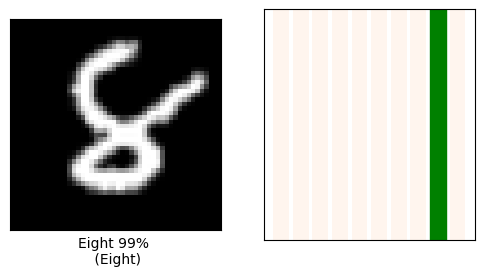

In [74]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, len(val_images))
plt.figure(figsize=(6,3)) #figure size in inch
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images"
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



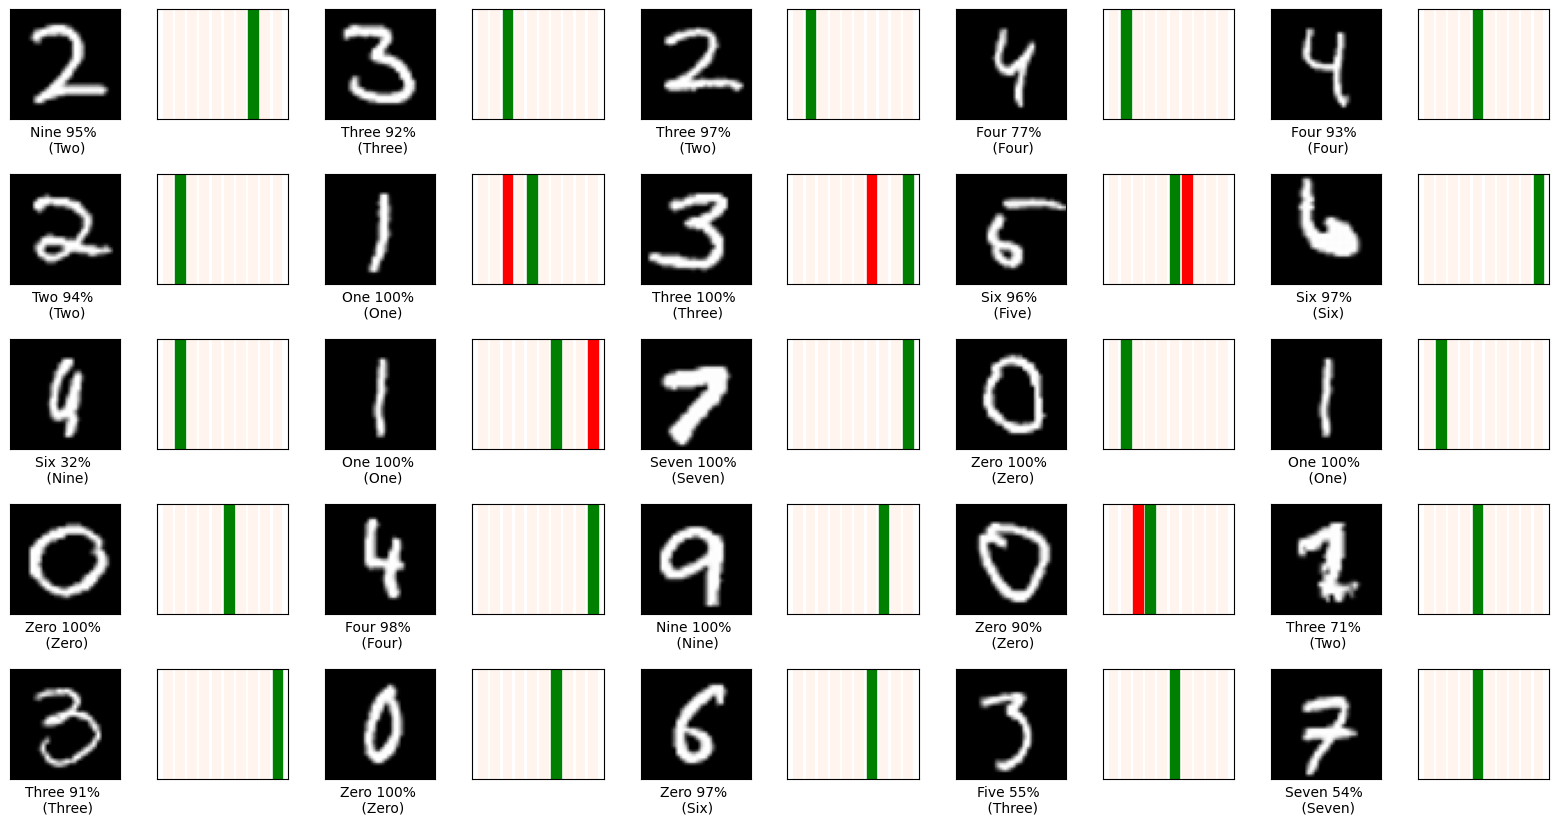

In [75]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,len(test_images))
    # we are passing "val_images_Original" just to show original image instead of "val_images"
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

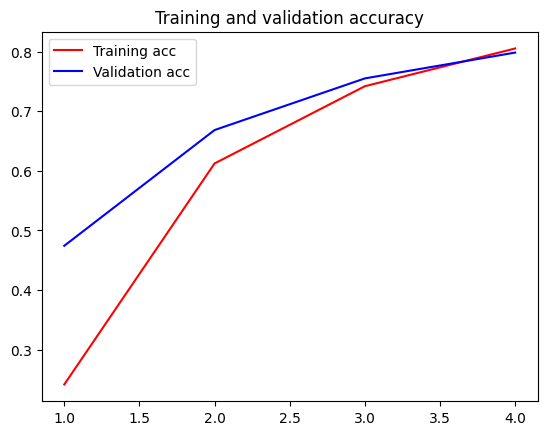

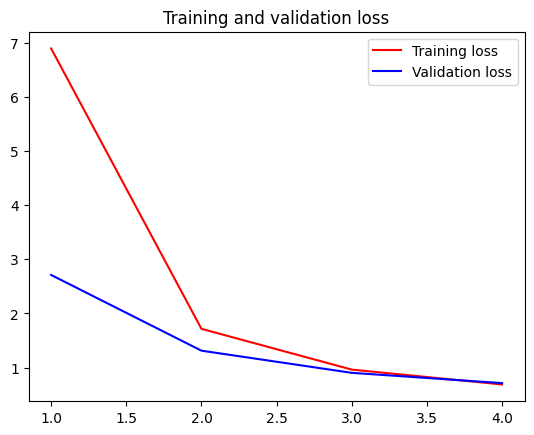

In [76]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [77]:
loss, acc = model.evaluate(xtest, ytest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10/10 [==============================] - 0s 37ms/step - loss: 0.7120 - accuracy: 0.7983

Test accuracy: 79.8%
